In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.6 kB/s 
     |████████████████████████████████| 1.6 MB 48.5 MB/s 
     |████████████████████████████████| 438 kB 75.4 MB/s 
     |████████████████████████████████| 5.8 MB 49.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## feature Engineering
geography=pd.get_dummies(X['Geography'], drop_first=True) ##one hot encoded
gender=pd.get_dummies(X['Gender'], drop_first=True) ##one hot encoded

In [ ]:
## drop the columns
X=X.drop(['Geography', 'Gender'], axis=1) ## axis will be one because we need to drop the columns

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
## concatenate these variables with the dataframes
X=pd.concat([X, geography, gender], axis=1)

In [ ]:
##spliting the dataset in training and testing 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
### now lets create a ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ELU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
##lets intialzie the ANN
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
## adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
## adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
##train the neural networks
##classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy']) ## by default adam use linearing rate 0.01

In [ ]:
### if you want to give your own learning rate then do following step
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
##train the neural networks
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
### Early Stopping(if the accuracy of training dataset is not increasing then stop training)
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
model_history=classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5285 - accuracy: 0.8433 - val_loss: 0.4092 - val_accuracy: 0.8485
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3785 - accuracy: 0.8600 - val_loss: 0.3776 - val_accuracy: 0.8466
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3571 - accuracy: 0.8638 - val_loss: 0.3754 - val_accuracy: 0.8451
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3540 - accuracy: 0.8610 - val_loss: 0.3738 - val_accuracy: 0.8474
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3441 - accuracy: 0.8660 - val_loss: 0.3743 - val_accuracy: 0.8482
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3470 - accuracy: 0.8628 - val_loss: 0.3729 - val_accuracy: 0.8474
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3440 - accuracy: 0.8643 - val_loss: 0.3736 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

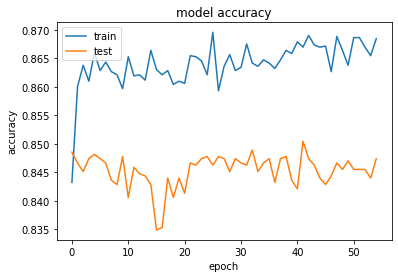

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

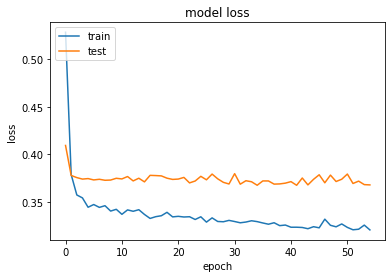

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##predict the test result
y_pred=classifier.predict(x_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1537,   58],
       [ 225,  180]])

In [ ]:
##calculate accuracy
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_pred, y_test)
acc_score

0.8585

In [ ]:
## gets the weights
classifier.get_weights()

[array([[-5.73282123e-01, -1.71550021e-01, -2.48551831e-01,
         -8.46253186e-02,  6.74411535e-01, -2.19299376e-01,
          4.28002924e-01, -4.92441416e-01, -9.00251642e-02,
          1.10890418e-02,  5.75713694e-01],
        [ 8.55184555e-01, -1.07069838e+00,  3.83527905e-01,
          5.71100175e-01, -8.72536778e-01, -5.02929032e-01,
         -5.89233458e-01, -4.39479463e-02,  4.83181953e-01,
         -8.74723911e-01, -1.82251498e-01],
        [-1.53405696e-01,  5.51122069e-01,  9.52497348e-02,
          4.46990430e-01,  5.93556345e-01,  1.70299232e-01,
         -1.84010133e-01,  2.50902250e-02,  1.46246254e-02,
          8.34224522e-02,  9.07770157e-01],
        [-3.52349579e-01, -6.02595627e-01, -1.45207599e-01,
          3.35948855e-01,  6.30211174e-01, -3.99681292e-02,
         -1.20106496e-01,  3.37422311e-01,  2.92961895e-01,
          4.46767718e-01, -9.40370560e-01],
        [-4.82691824e-02, -9.77428332e-02, -1.49108982e+00,
         -1.95287630e-01,  1.97738558e-01,  